<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/Week12_BayesIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction of Bayesian Posteriors


Agenda
 

* Bayes' Theorem
* Posterior Distribution
* Coin Flipping Example



## Bayes' Theorem

You may already be familiar with this theorem, most commonly written as

$$\mathrm{Pr}(A|B) = \frac{\mathrm{Pr}(A \cap B)}{\mathrm{Pr}(B)}\\
=\frac{\mathrm{Pr}(B|A)\cdot\mathrm{Pr}(A)}{\mathrm{Pr}(B|A)\cdot\mathrm{Pr}(A)+ \mathrm{Pr}(B|A')\cdot\mathrm{Pr}(A')}$$


It is important for many reasons, not the least of which is that it helps us understand probabilities that may not be intuitive to us as first glance.

#### Example

Suppose that a certain medical test is $99\%$ sensitive (meaning that if the condition exists, it will return positive with $p =.99$ probability) and $95\%$ specifity (meaning that if the condition does not exist, the tet will be negative with $p = .95$ probability).

Suppose the condition affects 2 in one thousand people ($p = .002$).  

1. If a person is tested at random and test positive, what is the probability that they have the condition?

2. If the person tests negative, what is the probability they do not have the disease?


**Solution**

We let 

$A = \text{Person has the disease}$ 

and 

$B = \text{The person tests positive}$

For 1, we want to know $\mathrm{Pr}(A|B)$

By Bayes' Theorem, 



$$\mathrm{Pr}(A|B) =\frac{\mathrm{Pr}(B|A)\cdot\mathrm{Pr}(A)}{\mathrm{Pr}(B|A)\cdot\mathrm{Pr}(A)+ \mathrm{Pr}(B|A')\cdot\mathrm{Pr}(A')}\\
=\frac{.99\cdot .002}{.99\cdot .002 + .05\cdot .998}\\
=0.038$$

or about $4\%$. (Chances are, it's a false positive).



2. We want 

$$\mathrm{Pr}(A'|B') =\frac{\mathrm{Pr}(B'|A')\cdot\mathrm{Pr}(A')}{\mathrm{Pr}(B'|A')\cdot\mathrm{Pr}(A')+ \mathrm{Pr}(B'|A)\cdot\mathrm{Pr}(A)}\\
=\frac{.95\cdot .998}{.95\cdot .998 + .01\cdot .002}\\
=0.99998$$

Or, the probability that they have the disease is now about $1$ in $47406$



## Posterior Distributions

We can also use Bayes' theorem to adjust our understanding of the parameters of a give distribution.  Suppose that we can observe a Random Variable $X$ with a distribution $f_X(x;\theta)$ where $\theta$ is an unkown parameter.  

Although we don't know $\theta$, we might have some prior information on what numbers are likely, we can quantify this with a "prior" PDF for $\theta$ given by $g_{\Theta}(\theta)$

Having obsrved a single instance of $X$, call it $x$, we can calculate liklihood function $L(\theta|x)$ via Bayes' theorem.

$$L(\theta|x) = \frac{f_X(x|\theta)g_{\Theta}(\theta)} {f_X(x)}$$

where the denominator $f_X(x)$ is the unconditional (or marginal) distribution for $X$.  It can be calculated via integration:

 $$f_X(x) = \int f_X(x|\theta) g_{\Theta}(\theta) d\theta $$



 Typically, we don't have just one observation $X$, but many, call them $\{x_i\} = (x_1,x_2, ...,x_n)$.  The above expression changes accordingly:


$$L(\theta|\{x_i\}) = \frac{f(x_1|\theta)f(x_2|\theta)\cdots f(x_n|\theta)g_{\Theta}(\theta)} {f_X(\{x_i\})}$$

where


$$f_X(\{x_i\}) = \int f(x_1|\theta)f(x_2|\theta)\cdots f(x_n|\theta)g_{\Theta}(\theta) d\theta$$


Note that there is an "f" for every observation, but only one $g$.




### Comments

* The liklihood $L(\theta|x)$ is *posterior* distribution of $\theta$, which can denote  $g_{\Theta}(\theta|\{x_i\})$

* The numerator does not depend on $\theta$, so it's really just a constant that ensures that the posteior distibution integrates to $1$.  That is, the numerator alone determines the posterior.

## Coin Flipping Example

In this example, we will assume that we have a coin that we can observe $n$ times (flip n times).  But we do not know the parameter $\theta$ that determines the probability of heads.   Now, let's suppose we have no idea at all what $\theta$ could be, but that it is between $0$ and $1$ (obviously).

For this reason, we place the prior distribution as the uniform distribution.

$$g_{\Theta}(\theta) = 1, 0\leq \theta \leq 1$$


### One Flip
Now, let's say we observe a single toss and it is heads?  How can we update our PDF for $\theta$?

Using the above:


$$g_{\Theta}(\theta|x=H) = L(\theta|x) = \frac{f_X(x|\theta)g_{\Theta}(\theta)} {f_X(x)}$$

In this instance, $f_X(x|\theta)$ is actually a probility mass function because it is a discrete distribution, but that doesn't change things.

$$f_X(x=H|\theta) = \theta$$


and $$f_X(x=H)  = \int_0^1f_X(x=H|\theta)g_{\Theta}(\theta) d\theta\\
=\int_0^1\theta \cdot 1 d\theta\\
=\frac{1}{2}$$


Hence,

$$g_{\Theta}(\theta|x=H) = \frac{\theta}{\frac{1}{2}} = 2\theta$$


Let's make a quick plot at what this looks like






In [ ]:
import numpy as np
import matplotlib.pyplot as plt



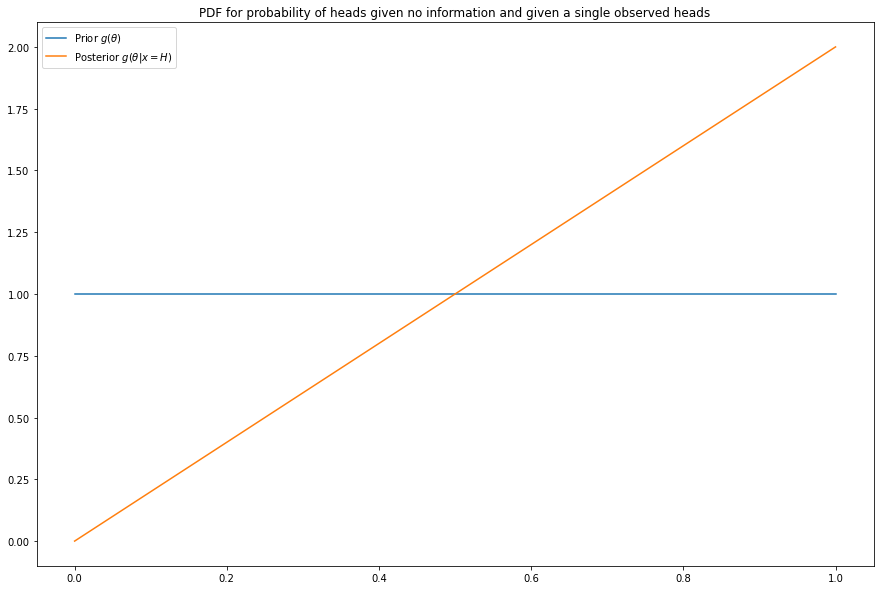

In [ ]:
t = np.linspace(0,1)

g = lambda t: np.ones(t.shape)

g1 = lambda t: 2*t

plt.figure(figsize = (15,10))

plt.plot(t,g(t), label = "Prior $g(\\theta)$")

plt.plot(t,g1(t), label = "Posterior $g(\\theta|x =H)$")

plt.title("PDF for probability of heads given no information and given a single observed heads")
plt.legend()

plt.show()

### Multiple Flips

We don't really learn much from a single flip.  A more realistic example might be we observe $10$ flips and see $7$ heads.

We can apply the same login however.  

In this case, we are looking at the binomial distribution where $X$ is the number of observed heads on 10 tosses.



$$f_X(x|\theta) = C(10,x) \theta^x (1-\theta)^{10-x}$$

and

$$f_X(x) = \int_0^1 f_X(x|\theta) g_{\Theta}(\theta) d\theta$$



hence

$$g_{\Theta}(\theta|x=7) = \frac{C(10,7) \theta^7(1-\theta)^3}{\int_0^1C(10,7) \theta^7(1-\theta)^3 d\theta} $$


Let's do the integration numerically and plot:





In [ ]:
from scipy.integrate import quad
from scipy.special import comb

from scipy.stats import beta

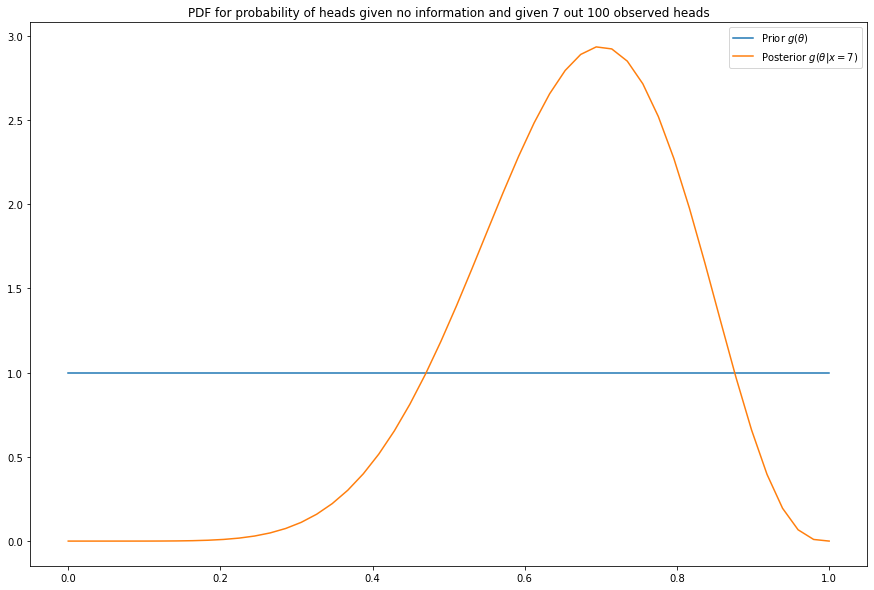

In [ ]:
t = np.linspace(0,1)

g = lambda t: np.ones(t.shape)

num = lambda t:  comb(10,7)*t**7*(1-t)**3

den = quad(num, 0,1)[0] # note that the denominator is not a function of theta
g2 = lambda t: num(t)/den

plt.figure(figsize = (15,10))

plt.plot(t,g(t), label = "Prior $g(\\theta)$")

plt.plot(t,g2(t), label = "Posterior $g(\\theta|x =7)$")

#plt.plot(t, beta.pdf(t,a=8, b = 4 ))

plt.title("PDF for probability of heads given no information and given 7 out 100 observed heads")
plt.legend()

plt.show()

If we were to point-estimate $\theta$ based on this distribution, we might choose the mode (analogous to MLE) or the mean.

In [ ]:
#mode

from scipy.optimize import fmin

fmin(lambda t: -g2(t), .5)

Optimization terminated successfully.
         Current function value: -2.935107
         Iterations: 13
         Function evaluations: 26


array([0.7])

In [ ]:
#mean

quad(lambda t: t*g2(t), 0,1)

(0.6666666666666665, 7.401486830834376e-15)

## Beta Distribution

It turns out that, if our prior was the uniform and we perform $N$ flips,  the posterior will will be of the form:

$$g_{\Theta}(\theta |x) \propto \theta^x (1-\theta)^{N-x}$$


The constant that goes with this is determined by the fact that PDF's need too integrate to one.  There is family of distribution that correspondss to this.  The beta bistribution.

For the beta distribution, the PDF is 

$$g_{\Theta}(\theta; \alpha, \beta) = \frac{\theta^{\alpha -1} (1-\theta)^{\beta -1}}{B(\alpha, \beta)}$$

where


$$B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}$$

But really you can think of the $B$ function as just the constant need to make things integrate to $1$.



So the result here is that, in our coin flipping problem, if our initial prior is the uniform distribution, then the posterior will be a beta distribution with $\alpha -1 = \text{The number of heads}$ and $\beta -1 =\text{The number of tails}$


### Something cool

Suppose that one actually did this in two stages,  

Stage 1:  Flip once and observe  single heads.  Obtaining the posterior $2\theta$ as above.

Stage 2: Flip $9$ more time and obtaining $6$ more heads. Using the posterior from stage 1 and the *new* prior, will the posterior also be the beta distribution?    

The answer is **YES** (left as exercise).

So one cool thing about the beta distribution with respect to the the binomial distribution is this:  If the prior is beta, so will the posterior (albeit with different parameters).   

This type of prior is called a "conjugate prior".
